<h1>
Ali Momtahen 810100213
</h1>

In [968]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn


In [969]:
data =  pd.read_csv('marketing_campaign.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         2240 non-null   int64  
 1   ID                 2240 non-null   int64  
 2   Year_Birth         2240 non-null   int64  
 3   Education          2240 non-null   object 
 4   Marital_Status     2240 non-null   object 
 5   Income             2017 non-null   float64
 6   Kidhome            2240 non-null   int64  
 7   Teenhome           2240 non-null   int64  
 8   Dt_Customer        2240 non-null   object 
 9   Recency            2240 non-null   int64  
 10  MntCoffee          2035 non-null   float64
 11  MntFruits          2240 non-null   int64  
 12  MntMeatProducts    2240 non-null   int64  
 13  MntFishProducts    2240 non-null   int64  
 14  MntSweetProducts   2240 non-null   int64  
 15  MntGoldProds       2227 non-null   float64
 16  NumWebVisitsMonth  2040 

In [970]:
data.describe()

,Unnamed: 0,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntCoffee,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumWebVisitsMonth,Complain,NumPurchases,UsedCampaignOffer
count,2240.000000,2240.000000,2240.000000,2017.000000,2240.000000,2240.000000,2240.000000,2035.000000,2240.000000,2240.000000,2240.000000,2240.000000,2227.000000,2040.000000,2240.000000,2240.000000,2240.000000
mean,1119.500000,5592.159821,1968.805804,52297.080317,0.437946,0.506250,49.109375,304.239312,26.302232,166.950000,37.525446,27.062946,43.847777,5.326961,0.009375,14.862054,0.271875
std,646.776623,3246.662198,11.984069,25543.108215,0.563666,0.544538,28.962453,337.515534,39.773434,225.715373,54.628979,41.280498,51.897098,2.439349,0.096391,7.677173,0.445025
min,0.000000,0.000000,1893.000000,2447.000000,-5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,559.750000,2828.250000,1959.000000,35340.000000,0.000000,0.000000,24.000000,23.000000,1.000000,16.000000,3.000000,1.000000,9.000000,3.000000,0.000000,8.000000,0.000000
50%,1119.500000,5458.500000,1970.000000,51369.000000,0.000000,0.000000,49.000000,177.000000,8.000000,67.000000,12.000000,8.000000,24.000000,6.000000,0.000000,15.000000,0.000000
75%,1679.250000,8427.750000,1977.000000,68316.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.000000,50.000000,33.000000,56.000000,7.000000,0.000000,21.000000,1.000000
max,2239.000000,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,20.000000,1.000000,44.000000,1.000000


<p style="text-align:center">

</p>

In [971]:
for col_name in data.columns:
    col_data = data[col_name]

    data_status = col_data.isna()

    size = data_status.shape[0]
    ok_sum = data_status.sum()

    print(col_name , "bad data=" , ok_sum , "good data=", size - ok_sum  ,  "ratio=" , (ok_sum)/size)


Unnamed: 0 bad data= 0 good data= 2240 ratio= 0.0
ID bad data= 0 good data= 2240 ratio= 0.0
Year_Birth bad data= 0 good data= 2240 ratio= 0.0
Education bad data= 0 good data= 2240 ratio= 0.0
Marital_Status bad data= 0 good data= 2240 ratio= 0.0
Income bad data= 223 good data= 2017 ratio= 0.09955357142857142
Kidhome bad data= 0 good data= 2240 ratio= 0.0
Teenhome bad data= 0 good data= 2240 ratio= 0.0
Dt_Customer bad data= 0 good data= 2240 ratio= 0.0
Recency bad data= 0 good data= 2240 ratio= 0.0
MntCoffee bad data= 205 good data= 2035 ratio= 0.09151785714285714
MntFruits bad data= 0 good data= 2240 ratio= 0.0
MntMeatProducts bad data= 0 good data= 2240 ratio= 0.0
MntFishProducts bad data= 0 good data= 2240 ratio= 0.0
MntSweetProducts bad data= 0 good data= 2240 ratio= 0.0
MntGoldProds bad data= 13 good data= 2227 ratio= 0.005803571428571429
NumWebVisitsMonth bad data= 200 good data= 2040 ratio= 0.08928571428571429
Complain bad data= 0 good data= 2240 ratio= 0.0
NumPurchases bad data= 

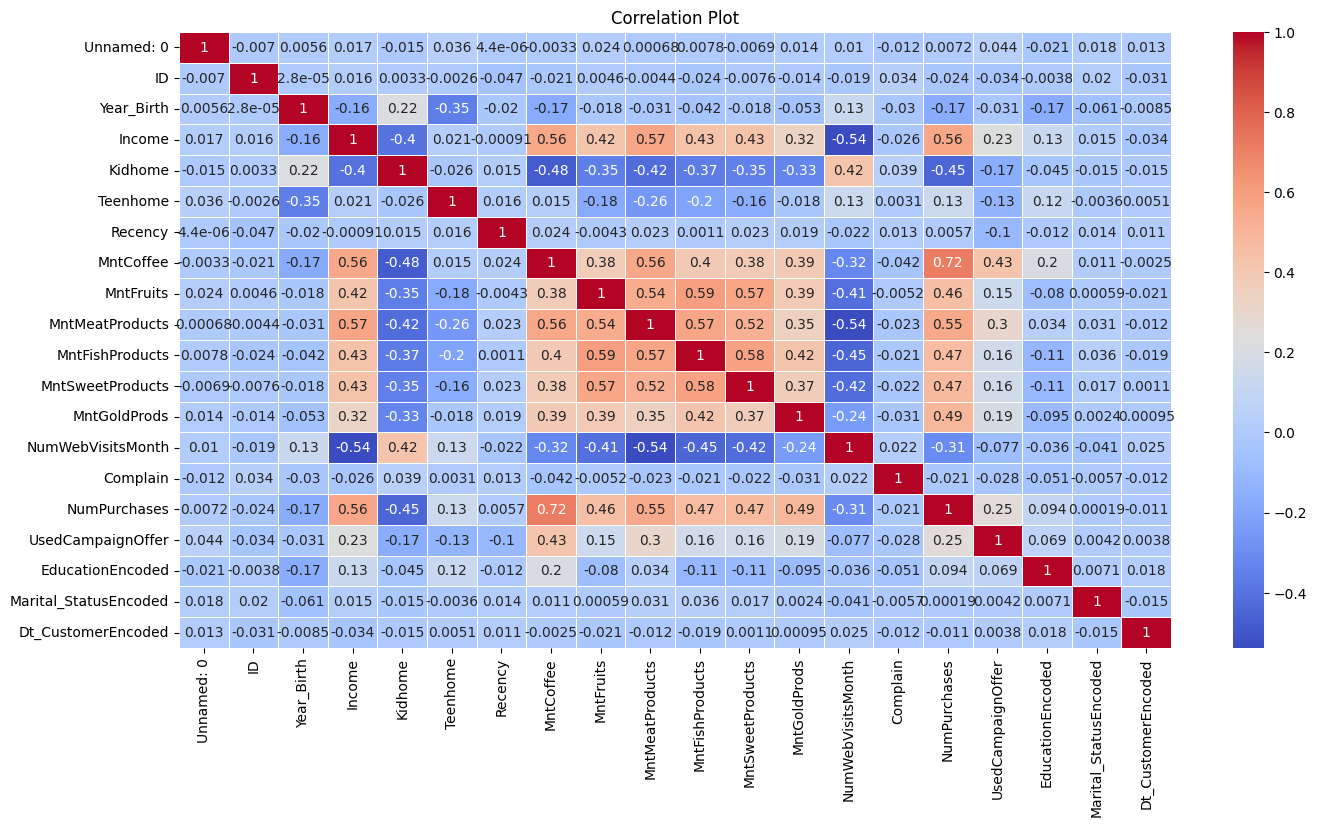

In [972]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
col_str = data.select_dtypes(include='object').columns
for column in col_str:
    data[f'{column}Encoded'] = le.fit_transform(data[column])
clear_new_col_data = data.drop(columns= col_str)
correlation_matrix = clear_new_col_data.corr()


plt.figure(figsize=(16, 8))
seaborn.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Plot')
plt.show()

<p style="text-align:center">
ویژگی های MntCoffe و income و mntmitproduct از بقیه وابستگی بیشتری دارند
</p>

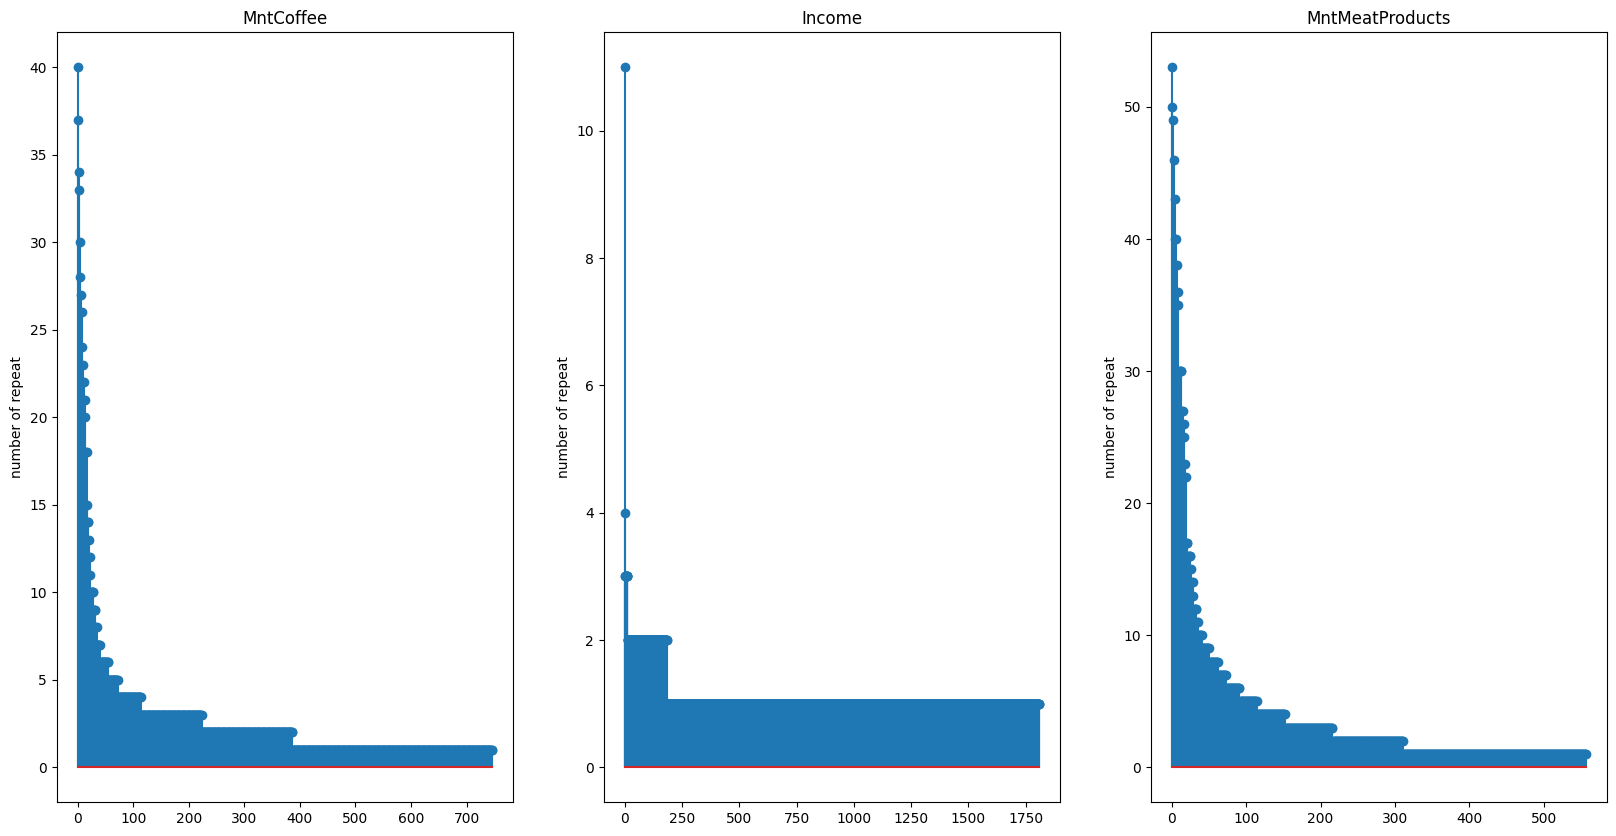

In [973]:
#4 

most_corr = ['MntCoffee', 'Income', 'MntMeatProducts']
count_map = {}
for name in most_corr:
    count_map[name] = data[name].value_counts()

gs = plt.GridSpec(1, 3)
fig = plt.figure(figsize=(20, 10))
for i, name in enumerate(most_corr):
    ax = fig.add_subplot(gs[0,i])
    ax.stem(count_map[name])
    ax.set_title(name)
    ax.set_ylabel('number of repeat')
plt.show()

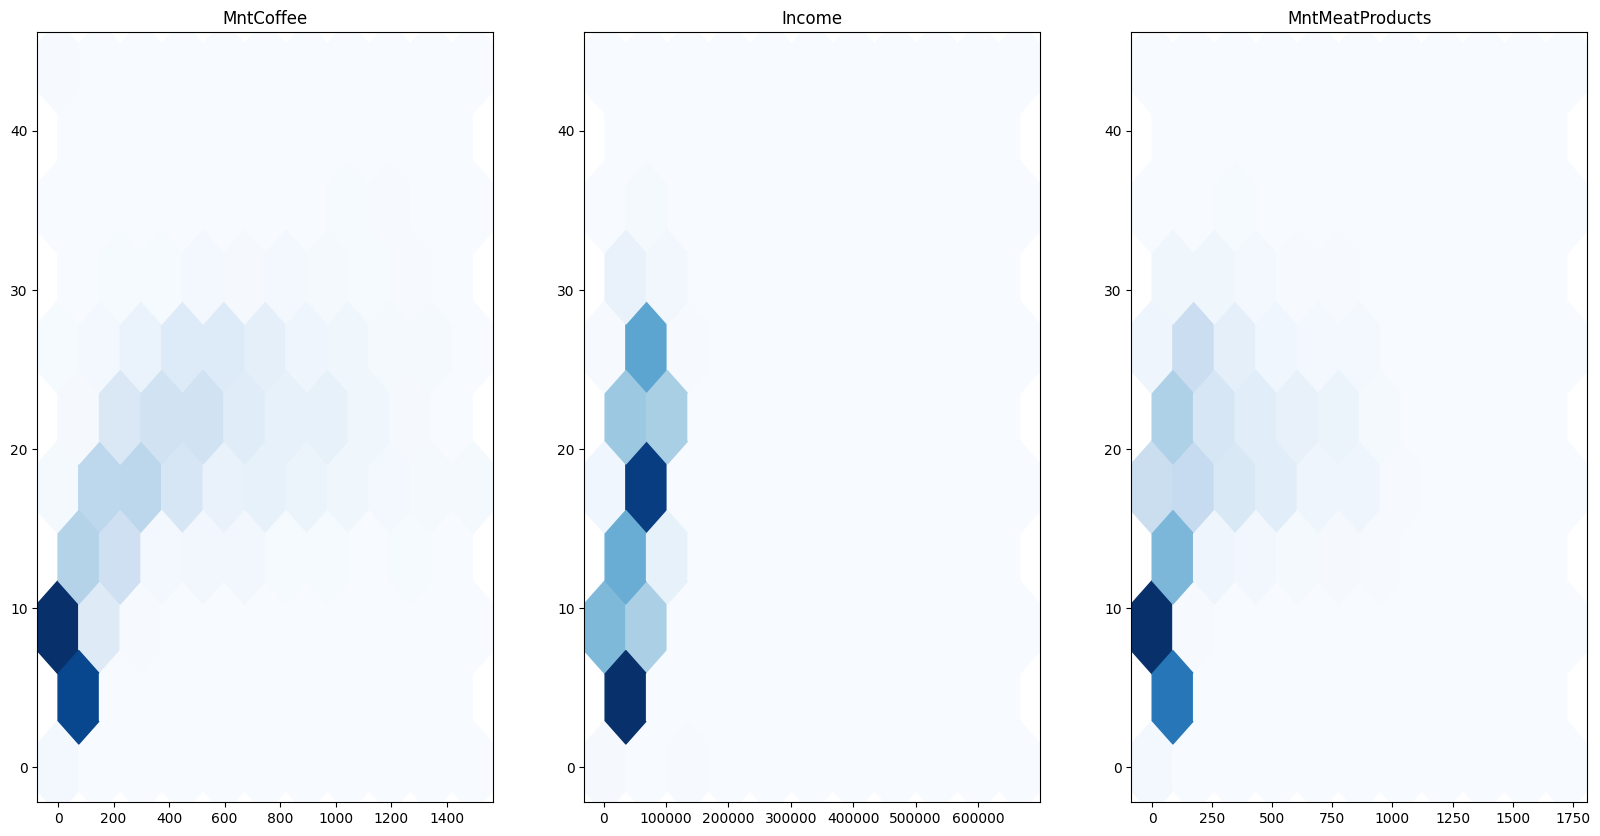

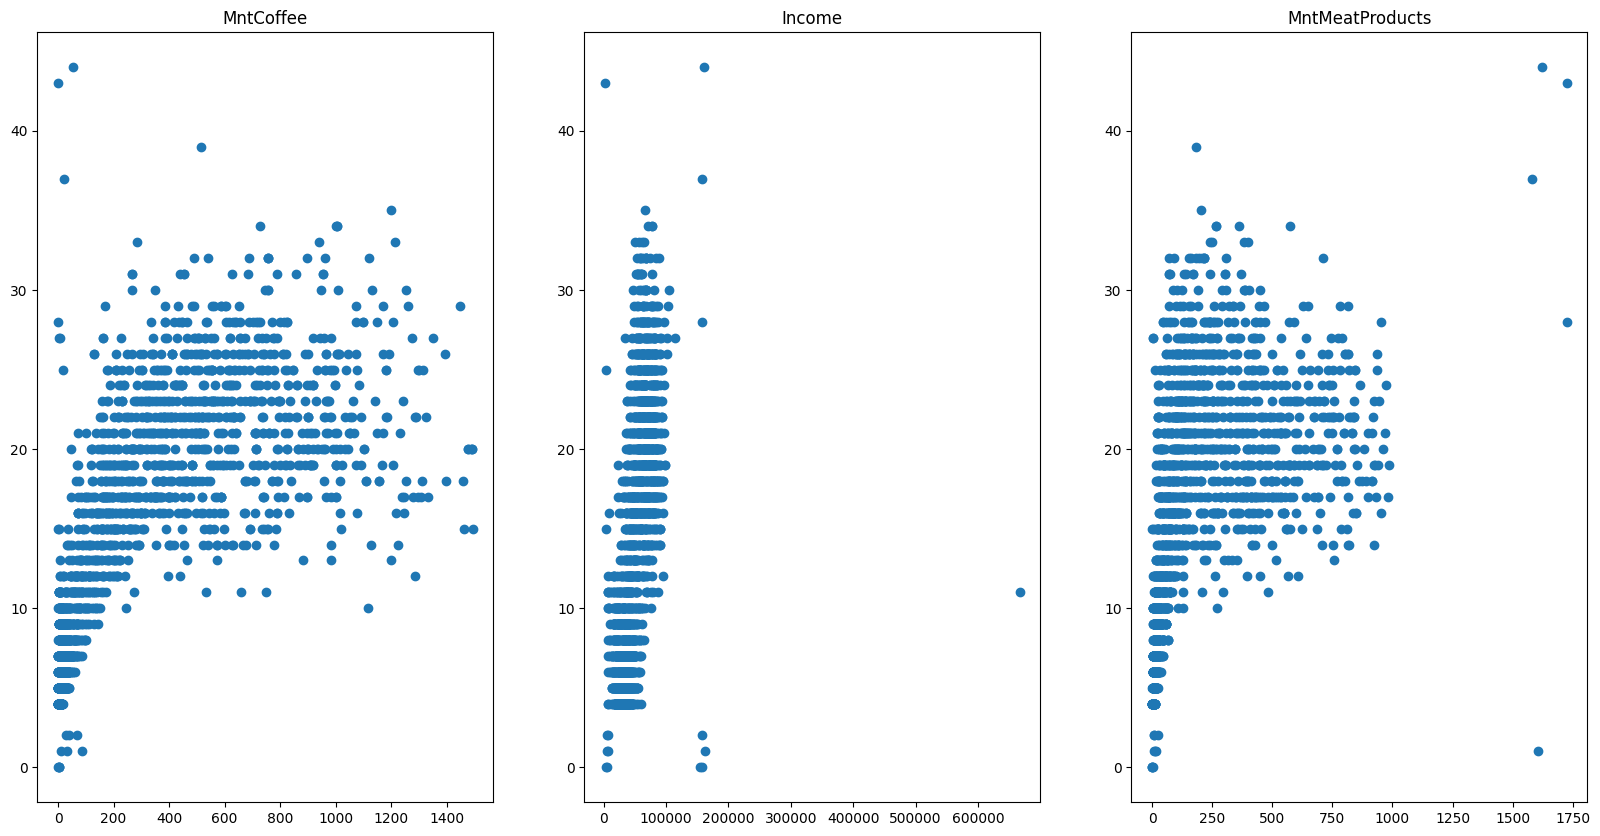

In [974]:
#5

gs = plt.GridSpec(1, 3)
fig = plt.figure(figsize=(20, 10))
for i, name in enumerate(most_corr):
    ax = fig.add_subplot(gs[0,i])
    ax.hexbin(data[name],data['NumPurchases'], gridsize=10, cmap='Blues')
    ax.set_title(name)




gs2 = plt.GridSpec(1, 3)
fig2 = plt.figure(figsize=(20, 10))
for i, name in enumerate(most_corr):
    ax = fig2.add_subplot(gs[0,i])
    ax.scatter(data[name], data['NumPurchases'])
    ax.set_title(name)
plt.show()

In [975]:
#6 :((((((((((()))))))))))

پیش پردازش مجموعه داده

#7
<div dir="rtl", style = "white-space: pre-wrap">
روش های متفاوتی وجود دارد روش حذف ستون برای وقتی خوب است که ستون هایی که داده های بد دارند مشخص باشند روش حذف سطر برای وقت هایی خوب است که تعداد سطر ها کم باشند در روش استفاده آماره می شود از آماره های مد  میانگین یا میانه می توان استفاده کرد 
در یک روش دیگر از داده قبلی یا بعدی استفاده می کنیم و مقدار آن ها را قرار می دهیم این برای وقتی مناسب است که داده ها به ترتیب به هم وابستگی داشته باشند در دیتا هایی که فریم های پشت سر هم به هم وابستگی دارند برای مثال ویس 
روشی مانند liner interpolation  برای وقتی که آپ سمپلینگ داریم خوب است



</div>

#8
<div dir="rtl", style = "white-space: pre-wrap">
ستون هایی که دارای حذفی بودند income mntCoffe numvisitones mntgold بودند

چون تعداد سطر هایی که این اشکال هستند درصد بزرگی بوده و ستون های آن مهم ترین ستون ها (دارای بیشترین ارتباط) بودند 
از روش جایگزینی مد استفاده می کنیم

</div>

In [976]:
bad_col = ['Income', 'MntCoffee', 'MntGoldProds', 'NumWebVisitsMonth']

for col_name in bad_col:
    data[col_name] = data[col_name].fillna(data[col_name].mode()[0])

for col_name in bad_col:
    aaa = data[col_name].isna()
    print(aaa.sum())


print(data[bad_col[0]])

0
0
0
0
0       58138.0
1       46344.0
2       71613.0
3       26646.0
4       58293.0
         ...   
2235    61223.0
2236    64014.0
2237    56981.0
2238    69245.0
2239    52869.0
Name: Income, Length: 2240, dtype: float64


#9
<div dir="rtl", style = "white-space: pre-wrap">
برای اینکه اندازه داده ها به طور یکسان و در یک بازه یکسان قرار گیرد
در این پروژه می توانیم این کار را انجام دهیم

</div>

#10
<div dir="rtl", style = "white-space: pre-wrap">
باید دیتا ها به صورت عددی در بیایند تا بتوان روی آن ها محاسبات انجام داد در این پروژه داده هایی که به این سکل هستند بدین صورت پیش پردازش می شوند





</div>
#11
<div dir="rtl", style = "white-space: pre-wrap">
بله ستون هایی که کرولیشن پایین تری دارند را می توان حذف کرد
</div>


#12
<div dir="rtl", style = "white-space: pre-wrap">
معمولا نسبت 70 30 یا 80 20 و این حدود را در نظر می گیرند
روش های آن به صورت رندوم می تواند باشد
یا به صورت آمار گیری خوشه ای که نسبت داده های در کلاس های مختلف ثابت باشد
</div>

#13
<div dir="rtl", style = "white-space: pre-wrap">
از آن ها برای پیدا کردن هایپر پارامتر های مسئله استفاده می شود
</div>
#14
<div dir="rtl", style = "white-space: pre-wrap">
در این روش دیتا را به کا بخش مساوی تقسیم کرده و هر دفعه یک قسمت کا به عنوان تست و بقیه ترین می شوند و این کار را به ازای همه بخش ها انجام می دهیم
</div>



# Linear Regression

Main form of simple linear regression function:
$$f(x) = \alpha x + \beta$$

here we want to find the bias ($\alpha$) and slope($\beta$) by minimizing the derivation of the Residual Sum of Squares (RSS) function:

- step 1: Compute RSS of the training data  

$$ RSS = \Sigma (y_i - (\hat{\beta} + \hat{\alpha} * x_i) )^2 $$

- step 2: Compute the derivatives of the RSS function in terms of $\alpha$ and $\beta$, and set them equal to 0 to find the desired parameters

$$ \frac{\partial RSS}{\partial \beta} = \Sigma (-f(x_i) + \hat{\beta} + \hat{\alpha} * x_i) = 0$$
$$ \to \beta = \hat{y} - \hat{\alpha} \hat{x} \to (1)$$


$$ \frac{\partial RSS}{\partial \alpha} = \Sigma (-2 x_i y_i + 2 \hat{\beta} x_i + 2\hat{\alpha} x_i ^ 2) = 0 \to (2)$$

$$ (1) , (2) \to \hat{\alpha} = \frac{\Sigma{(x_i - \hat{x})(y_i - \hat{y})}}{\Sigma{(x_i - \hat{x})^2}}
$$
$$ \hat{\beta} = y - \hat{a} x$$



Based on the above formula, implement the function below to compute the parameters of a simple linear regression

In [977]:
def simple_linear_regression(input_feature, output):
    temp = np.sum((input_feature - np.mean(input_feature)) * (output - np.mean(output)))
    alpha = temp/np.sum((input_feature - np.mean(input_feature))**2)
    beta = np.mean(output) - alpha*np.mean(input_feature)
    return alpha, beta

    
    
    

Now complete this `get_regression_predictions(...)` function to predict the value of given data based on the calculated intercept and slope

In [978]:
def get_regression_predictions(input_feature, bias, slope):
    return input_feature * slope + bias
    

Now that we have a model and can make predictions, let's evaluate our model using Root Mean Square Error (RMSE). RMSE is the square root of the mean of the squared differences between the residuals, and the residuals is just a fancy word for the difference between the predicted output and the true output.

Complete the following function to compute the RSME of a simple linear regression model given the input_feature, output, intercept and slope:

In [979]:
def get_root_mean_square_error(predicted_values, outputs):
    return np.sqrt(np.sum((predicted_values - outputs)**2)/len(outputs))



get_root_mean_square_error(np.array([0 , 0 , 0]) , np.array([2 , 1 , 3]))

2.160246899469287

The RMSE has no bound, thus it becomes challenging to determine whether a particular RMSE value is considered good or bad without any reference point. Instead, we use R2 score. The R2 score is calculated by comparing the sum of the squared differences between the actual and predicted values of the dependent variable to the total sum of squared differences between the actual and mean values of the dependent variable. The R2 score is formulated as below:

$$R^2 = 1 - \frac{SSres}{SStot} = 1 - \frac{\sum_{i=1}^{n} (y_{i,true} - y_{i,pred})^2}{\sum_{i=1}^{n} (y_{i,true} - \bar{y}_{true})^2} $$

Complete the following function to calculate the R2 score of a given input_feature, output, bias, and slope:

In [980]:
def get_r2_score(predicted_values, outputs):
    sorat = np.sum((outputs - predicted_values)**2)
    makhraj = np.sum((outputs - np.mean(outputs))**2)
    return 1-(sorat/makhraj)



get_r2_score(np.array([0 , 0 , 0]) , np.array([2 , 1 , 3]))

-6.0

In [981]:
def get_rss_score(predicted_values, outputs):
    return np.sum(((outputs - predicted_values)**2))

def get_mse_error(predicted_values , outputs):
    return get_rss_score(predicted_values , outputs) / len(outputs)

#16
<div dir="rtl", style = "white-space: pre-wrap">
ما mntcoffe را انتخاب می کنیم که کورلیشن بیشتری با خروجی دارد

</div>

#17
<div dir="rtl", style = "white-space: pre-wrap">
RSS
می آید مجموع مربعات اختلاف هر پیش بینی با جواب اصلی را حساب می کند
MSE
همان RSS است با این تفاوت که نرمالایز شده و بر تعداد خروجی تقسیم می شود
RMSE
 در واقع این است که ازMSE یک رادیکال بگیریم در واقع برای نرمال کردن بیشتر خطاست
R2 score
برابر 1 منهای نسبت جمع اختلاف جواب های اصلی با پیشبینی بر جمع اختلاف جواب اصلی با میانگین جواب های اصلی است

</div>

Now calculate the fitness of the model.
Remember to provide explanation for the outputs in your code!

In [982]:
designated_feature_list = ['MntCoffee', 'Income', 'MntMeatProducts']# ToDo
num_purchases_name = "NumPurchases"

for feature_name in designated_feature_list:
    alpha , beta = simple_linear_regression((data[feature_name].array) , (data[num_purchases_name].array))
    print(alpha , beta)
    pred = get_regression_predictions(data[feature_name]  , beta , alpha)
   
    
    RMSE_err =  get_root_mean_square_error((pred) , (data[num_purchases_name]))
    R2_err = get_r2_score((pred) , (data[num_purchases_name]))
    RSS = get_rss_score((pred) , (data[num_purchases_name]))
    MSE = get_mse_error((pred) , (data[num_purchases_name]))
    print(feature_name , "-> "  "RMSE :",RMSE_err , "  R2:" , R2_err , "  RSS:" , RSS ,  "  MSE:" , MSE)

    

# ToDo
#  measure the performance of the simple linear regression model

0.015175138988643514 10.664928534103913
MntCoffee -> RMSE : 5.774330897332774   R2: 0.4340283865906702   RSS: 74688.08997863792   MSE: 33.342897311891925
0.00013222261441951378 8.53687131321346
Income -> RMSE : 6.745489313229462   R2: 0.2276427425768326   RSS: 101923.64240776005   MSE: 45.50162607489288
0.018850785916916885 11.714914862599297
MntMeatProducts -> RMSE : 6.388777030316995   R2: 0.3071698520009153   RSS: 91428.89715255753   MSE: 40.816471943106045


#18

<div dir="rtl", style = "white-space: pre-wrap">
می بینیم که mntcoffee بهترین نتیجه را داشته است
</div>

# Multiple Regression

Multiple regression is a statistical technique that aims to model the relationship between a dependent variable and two or more independent variables.

Multiple regression with n independent variables is expressed as follows:

$$f(x) = \beta _{0} + \beta_{1} x_{1} + \beta_{2} x_{2} + \beta_{3} x_{3} + \beta_{4} x_{4} + ... + \beta_{n} x_{n} + c $$

To optimize the model for accurate predictions, multiple regression commonly employs iterative algorithms such as gradient descent.

The main goal of the optimization process is to make our predictions as close as possible to the actual values.
We measure the prediction error using a cost function, usually denoted as $J(\beta)$.

$$ J(\beta)= \frac {1}{2m} Σ_{i=0}^{m-1}(y_i - (\hat \beta _{0} + \hat \beta_{1} x_{1} + \hat \beta_{2} x_{2} + \hat \beta_{3} x_{3} + \hat \beta_{4} x_{4} + ... + \hat \beta_{n} x_{n}) )^2  $$

Gradient descent iteratively adjusts the coefficients $(\beta_i)$ to minimize the cost function. The update rule for each coefficient is:

$$\beta_{i} = \beta _ {i} - \alpha \frac {∂J(\beta)}{∂\beta_{i}}$$

$$ \frac {∂J(\beta)}{∂\beta_{i}} = \frac {1}{m}Σ_{j=0}^{m-1}(y_j - (\hat \beta _{0} + \hat \beta_{1} x_{j1} + \hat \beta_{2} x_{j2} + \hat \beta_{3} x_{j3} + \hat \beta_{4} x_{j4} + ... + \hat \beta_{n} x_{jn})) x_{ji} $$



## Predicting output given regression weights

Based on the formula above and [np.dot()](https://numpy.org/doc/stable/reference/generated/numpy.dot.html) method, complete this function to compute the predictions for an entire matrix of features given the matrix, bias, and the weights. Provide an explanation of np.dot method and the reasoning behind using this method in your code:

In [983]:
def predict_output(feature_matrix, weights, bias):
    
    return np.dot(feature_matrix, weights) + bias
    

## Computing the Derivative

As we saw, the cost function is the sum over the data points of the squared difference between an observed output and a predicted output.

Since the derivative of a sum is the sum of the derivatives, we can compute the derivative for a single data point and then sum over data points. We can write the squared difference between the observed output and predicted output for a single point as follows:

$$
(output  - (const* w _{0} + [feature_1] * w_{1} + ...+ [feature_n] * w_{n}  ))^2
$$

With n feautures and a const , So the derivative will be :


$$
2 * (output  - (const* w _{0} + [feature_1] * w_{1} + ...+ [feature_n] * w_{n}  ))
$$

The term inside the paranethesis is just the error (difference between prediction and output). So we can re-write this as:

$$2 * error*[feature_i] $$


That is, the derivative for the weight for feature i is the sum (over data points) of 2 times the product of the error and the feature itself. In the case of the constant then this is just twice the sum of the errors!

Recall that twice the sum of the product of two vectors is just twice the dot product of the two vectors. Therefore the derivative for the weight for feature_i is just two times the dot product between the values of feature_i and the current errors.


With this in mind, complete the following derivative function which computes the derivative of the weight given the value of the feature (over all data points) and the errors (over all data points).


In [984]:
def feature_derivative(errors, feature):
    # ToDo
    return (2) * np.dot(errors, feature)

## Gradient Descent

Now we will write a function that performs a gradient descent. The basic premise is simple. Given a starting point we update the current weights by moving in the negative gradient direction. Recall that the gradient is the direction of increase and therefore the negative gradient is the direction of decrease and we're trying to minimize a cost function.


The amount by which we move in the negative gradient direction is called the 'step size'. We stop when we are 'sufficiently close' to the optimum. We define this by requiring that the magnitude (length) of the gradient vector to be smaller than a fixed 'tolerance'.


With this in mind, complete the following gradient descent function below using your derivative function above. For each step in the gradient descent we update the weight for each feature befofe computing our stopping criteria.

In [985]:
def regression_gradient_descent(feature_matrix, outputs, initial_weights, bias, step_size, tolerance):
    
    new_weights = initial_weights

    while 1:
        errors = outputs - predict_output(feature_matrix, new_weights, bias)
        deriv = feature_derivative(errors, feature_matrix)
        
        new_weights = new_weights + step_size * deriv
        bias += step_size * 2 * np.sum(errors)
        initial_weights = new_weights
        if (np.linalg.norm(deriv) < tolerance):
            break
    return initial_weights, bias
        


In [986]:
# Utility functions for multiple regression
from sklearn.model_selection import train_test_split
def normalize_features(chosen_features, data_frame):
    for feature in chosen_features:
        data_frame[feature] = (data_frame[feature] - data_frame[feature].mean()) / data_frame[feature].std()
    return data_frame


def n_feature_regression(chosen_feature_matrix, target_matrix, keywords):
    initial_weights = keywords['initial_weights']
    step_size = keywords['step_size']
    tolerance = keywords['tolerance']
    bias = keywords['bias']

    weights, bias = regression_gradient_descent(chosen_feature_matrix, target_matrix, initial_weights, bias, step_size,
                                                tolerance)

    return weights, bias

def get_weights_and_bias(chosen_features, train_x, train_y):
    """
    Computes the weights and bias for a general n feature model.
    :param chosen_features:  list of features to perform multiple regression on
    :return: chosen_feature_matrix, computed weights and bias via regression
    """

    # ToDo
    #  Would selecting different initial weights make any difference?
    #  Explain your answer.
    keywords = {
        'initial_weights': np.array([.5]*len(chosen_features)),
        'step_size': 1.e-4,
        'tolerance': 1.e-10,
        'bias': 0
    }

    chosen_feature_dataframe = train_x[chosen_features]
    # ToDo
    #  Why are the features normalized?
    chosen_feature_dataframe = normalize_features(chosen_features, chosen_feature_dataframe)
    chosen_feature_matrix = chosen_feature_dataframe.to_numpy()
    target_column = train_y
    target_matrix = target_column.to_numpy()

    train_weights, bias = n_feature_regression(chosen_feature_matrix, target_matrix, keywords)

    return chosen_feature_matrix, train_weights, bias

## Two Feature Regression

In this part, you should choose 2 features and implement multiple regression on them :

In [987]:
chosen_features = ['MntCoffee', 'Income'] 
split_ratio = 0.8
choosed = np.random.rand(data.shape[0]) < split_ratio
train_x = data.iloc[choosed]
train_y = data[num_purchases_name].iloc[choosed]
test_x = data.iloc[~choosed]
test_y = data[num_purchases_name].iloc[~choosed]
chosen_feature_matrix_train, train_weights, train_bias = get_weights_and_bias(chosen_features, train_x, train_y)
chosen_feature_matrix_train, test_weight, test_bias = get_weights_and_bias(chosen_features, test_x, test_y)



C:\Users\Ali.M\AppData\Local\Temp\ipykernel_13692\2878261110.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_frame[feature] = (data_frame[feature] - data_frame[feature].mean()) / data_frame[feature].std()
C:\Users\Ali.M\AppData\Local\Temp\ipykernel_13692\2878261110.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_frame[feature] = (data_frame[feature] - data_frame[feature].mean()) / data_frame[feature].std()


In [988]:
pred_test =  predict_output(chosen_feature_matrix_train , train_weights , train_bias)
print("RMSE ERROR: "  , get_root_mean_square_error(pred_test, test_y))
print("R2 SCORE:" ,  get_r2_score(pred_test , test_y ))

RMSE ERROR:  5.185349148113775
R2 SCORE: 0.510487340977877


## Three Feature Regression

Now repeat the steps for 3 features

In [989]:
chosen_features = ['MntCoffee', 'Income' , 'MntMeatProducts' ] 
split_ratio = 0.8
choosed = np.random.rand(data.shape[0]) < split_ratio
train_x = data.iloc[choosed]
train_y = data[num_purchases_name].iloc[choosed]
test_x = data.iloc[~choosed]
test_y = data[num_purchases_name].iloc[~choosed]
chosen_feature_matrix_train, train_weights, train_bias = get_weights_and_bias(chosen_features, train_x, train_y)
chosen_feature_matrix_train, test_weight, test_bias = get_weights_and_bias(chosen_features, test_x, test_y)
pred_test =  predict_output(chosen_feature_matrix_train , train_weights , train_bias)
print("RMSE ERROR" , get_root_mean_square_error(pred_test,np.array(test_x[num_purchases_name])))
print("R2 SCORE: ",  get_r2_score(pred_test ,np.array(test_x[num_purchases_name])))

RMSE ERROR 4.893357145411372
R2 SCORE:  0.5739634882432125


C:\Users\Ali.M\AppData\Local\Temp\ipykernel_13692\2878261110.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_frame[feature] = (data_frame[feature] - data_frame[feature].mean()) / data_frame[feature].std()
C:\Users\Ali.M\AppData\Local\Temp\ipykernel_13692\2878261110.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_frame[feature] = (data_frame[feature] - data_frame[feature].mean()) / data_frame[feature].std()


## Five Feature Regression

Finally, repeat the steps for 5 features

Explain the differences in the results and the reasoning behind these variations.

In [990]:
# ToDo
chosen_features = ['MntCoffee', 'Income' , 'MntMeatProducts' , 'MntGoldProds' , 'MntFishProducts' ] 

split_ratio = 0.7
choosed = np.random.rand(data.shape[0]) < split_ratio
train_x = data.iloc[choosed]
train_y = data[num_purchases_name].iloc[choosed]
test_x = data.iloc[~choosed]
test_y = data[num_purchases_name].iloc[~choosed]
chosen_feature_matrix_train, train_weights, train_bias = get_weights_and_bias(chosen_features, train_x, train_y)
chosen_feature_matrix_train, test_weight, test_bias = get_weights_and_bias(chosen_features, test_x, test_y)
pred_test =  predict_output(chosen_feature_matrix_train , train_weights , train_bias)
print("RMSE ERROR: " , get_root_mean_square_error(pred_test,np.array(test_x[num_purchases_name])))
print("R2 SCORE: " ,get_r2_score(pred_test ,np.array(test_x[num_purchases_name])))

RMSE ERROR:  5.011545905159948
R2 SCORE:  0.5906083716549644


C:\Users\Ali.M\AppData\Local\Temp\ipykernel_13692\2878261110.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_frame[feature] = (data_frame[feature] - data_frame[feature].mean()) / data_frame[feature].std()
C:\Users\Ali.M\AppData\Local\Temp\ipykernel_13692\2878261110.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_frame[feature] = (data_frame[feature] - data_frame[feature].mean()) / data_frame[feature].std()


<div dir="rtl", style = "white-space: pre-wrap">
5 ویژگی انتخاب شده در قسمت 5 تایی 5 ویژگی با بیشترین کورولیشن هستند دلیل اننتخاب آن ها هم همین هست 
در بخش های 2 و 3 تایی هم همینگونه است و 2 و 3 ویژگی با داشتن بیشترین کورولیشن انتخاب شده اند




همچنین با انتخاب 3 ویزگی مدل مقداری بهتر کار می کند که دلیل آن این است که 3 ویژگی مرتبط انتخاب شده اما 5 ویژگی می تواند ارتباط را از بین ببرد زیرا ویژگی های 4 و5 ارتباط کمتری با خروجی دارند
</div>

<h1>PHAS 3</h3>


In [991]:
from sklearn import tree,neighbors,linear_model,ensemble
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score

In [992]:
purchase_data = data[num_purchases_name]
purchase_data = np.array(purchase_data)
purchase_class = np.where(purchase_data < np.median(purchase_data),0,1)
feature_names = ['MntCoffee', 'Income' , 'MntMeatProducts' , 'MntGoldProds' , 'MntFishProducts' , "Recency"]
x_train,x_test,y_train,y_test = train_test_split(np.array(data[feature_names]), purchase_class.reshape(-1,1))

Fitting 3 folds for each of 980 candidates, totalling 2940 fits


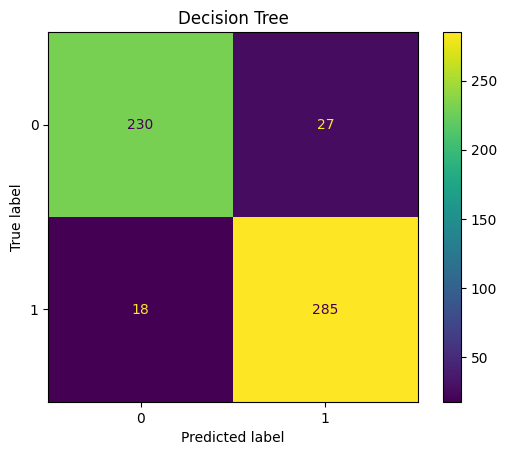

f1_score: 0.926829268292683


In [993]:
params = {'max_leaf_nodes': list(range(2, 100)), 'max_depth': list(range(5, 10)),'criterion':['entropy','gini']}
dec_tree = GridSearchCV(tree.DecisionTreeClassifier(random_state=42), params, verbose=1, cv=3)
dec_tree.fit(x_train,y_train)
pred = dec_tree.predict(x_test)
cm = confusion_matrix(y_test, pred, labels=dec_tree.classes_ )
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=dec_tree.classes_)
disp.plot()
plt.title("Decision Tree")
plt.show()



print("f1_score:" , f1_score(y_test , pred))


c:\Users\Ali.M\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\Users\Ali.M\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, a

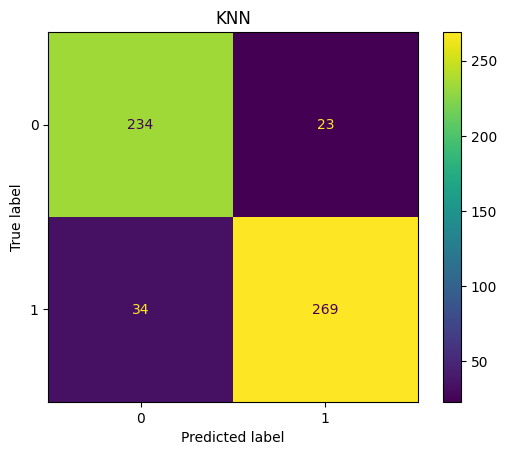

f1_score: 0.9042016806722689


In [994]:
param = {'n_neighbors':[i for i in range(3,14,2)]}
knn_model = GridSearchCV(neighbors.KNeighborsClassifier(),param_grid=param)
knn_model.fit(x_train,np.squeeze(y_train))
pred = knn_model.predict(x_test)
cm = confusion_matrix(np.squeeze(y_test), pred, labels=knn_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=knn_model.classes_)

disp.plot()
plt.title("KNN")
plt.show()

print("f1_score:" , f1_score(y_test , pred))


c:\Users\Ali.M\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Ali.M\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

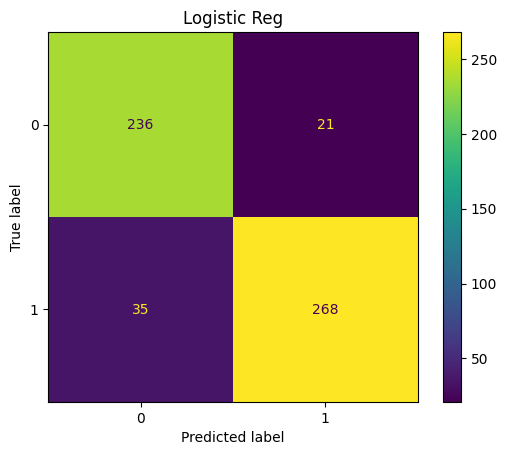

f1_score: 0.9054054054054054


In [995]:
params = {'tol':[0.0001,0.00001,0.000001]}
logestic_model = GridSearchCV(linear_model.LogisticRegression(),param_grid=params)
logestic_model.fit(x_train,np.squeeze(y_train))
pred = logestic_model.predict(x_test)
cm = confusion_matrix(np.squeeze(y_test), pred, labels=logestic_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=logestic_model.classes_)
disp.plot()
plt.title('Logistic Reg')
plt.show()


print("f1_score:" , f1_score(y_test , pred))




#21
<div dir="rtl", style = "white-space: pre-wrap">

overfitting: وقتی که مدل روی داده های ترین زیادی فیت شده و روی داده های تست خوب عمل نمیکند
underfitting: وقتی مدل روی تست و ترین هیچ کدام خوب عمل نکرده و زیادی ساده باشد

در مدل ما اورفیتینگ رخ نداده است

</div>

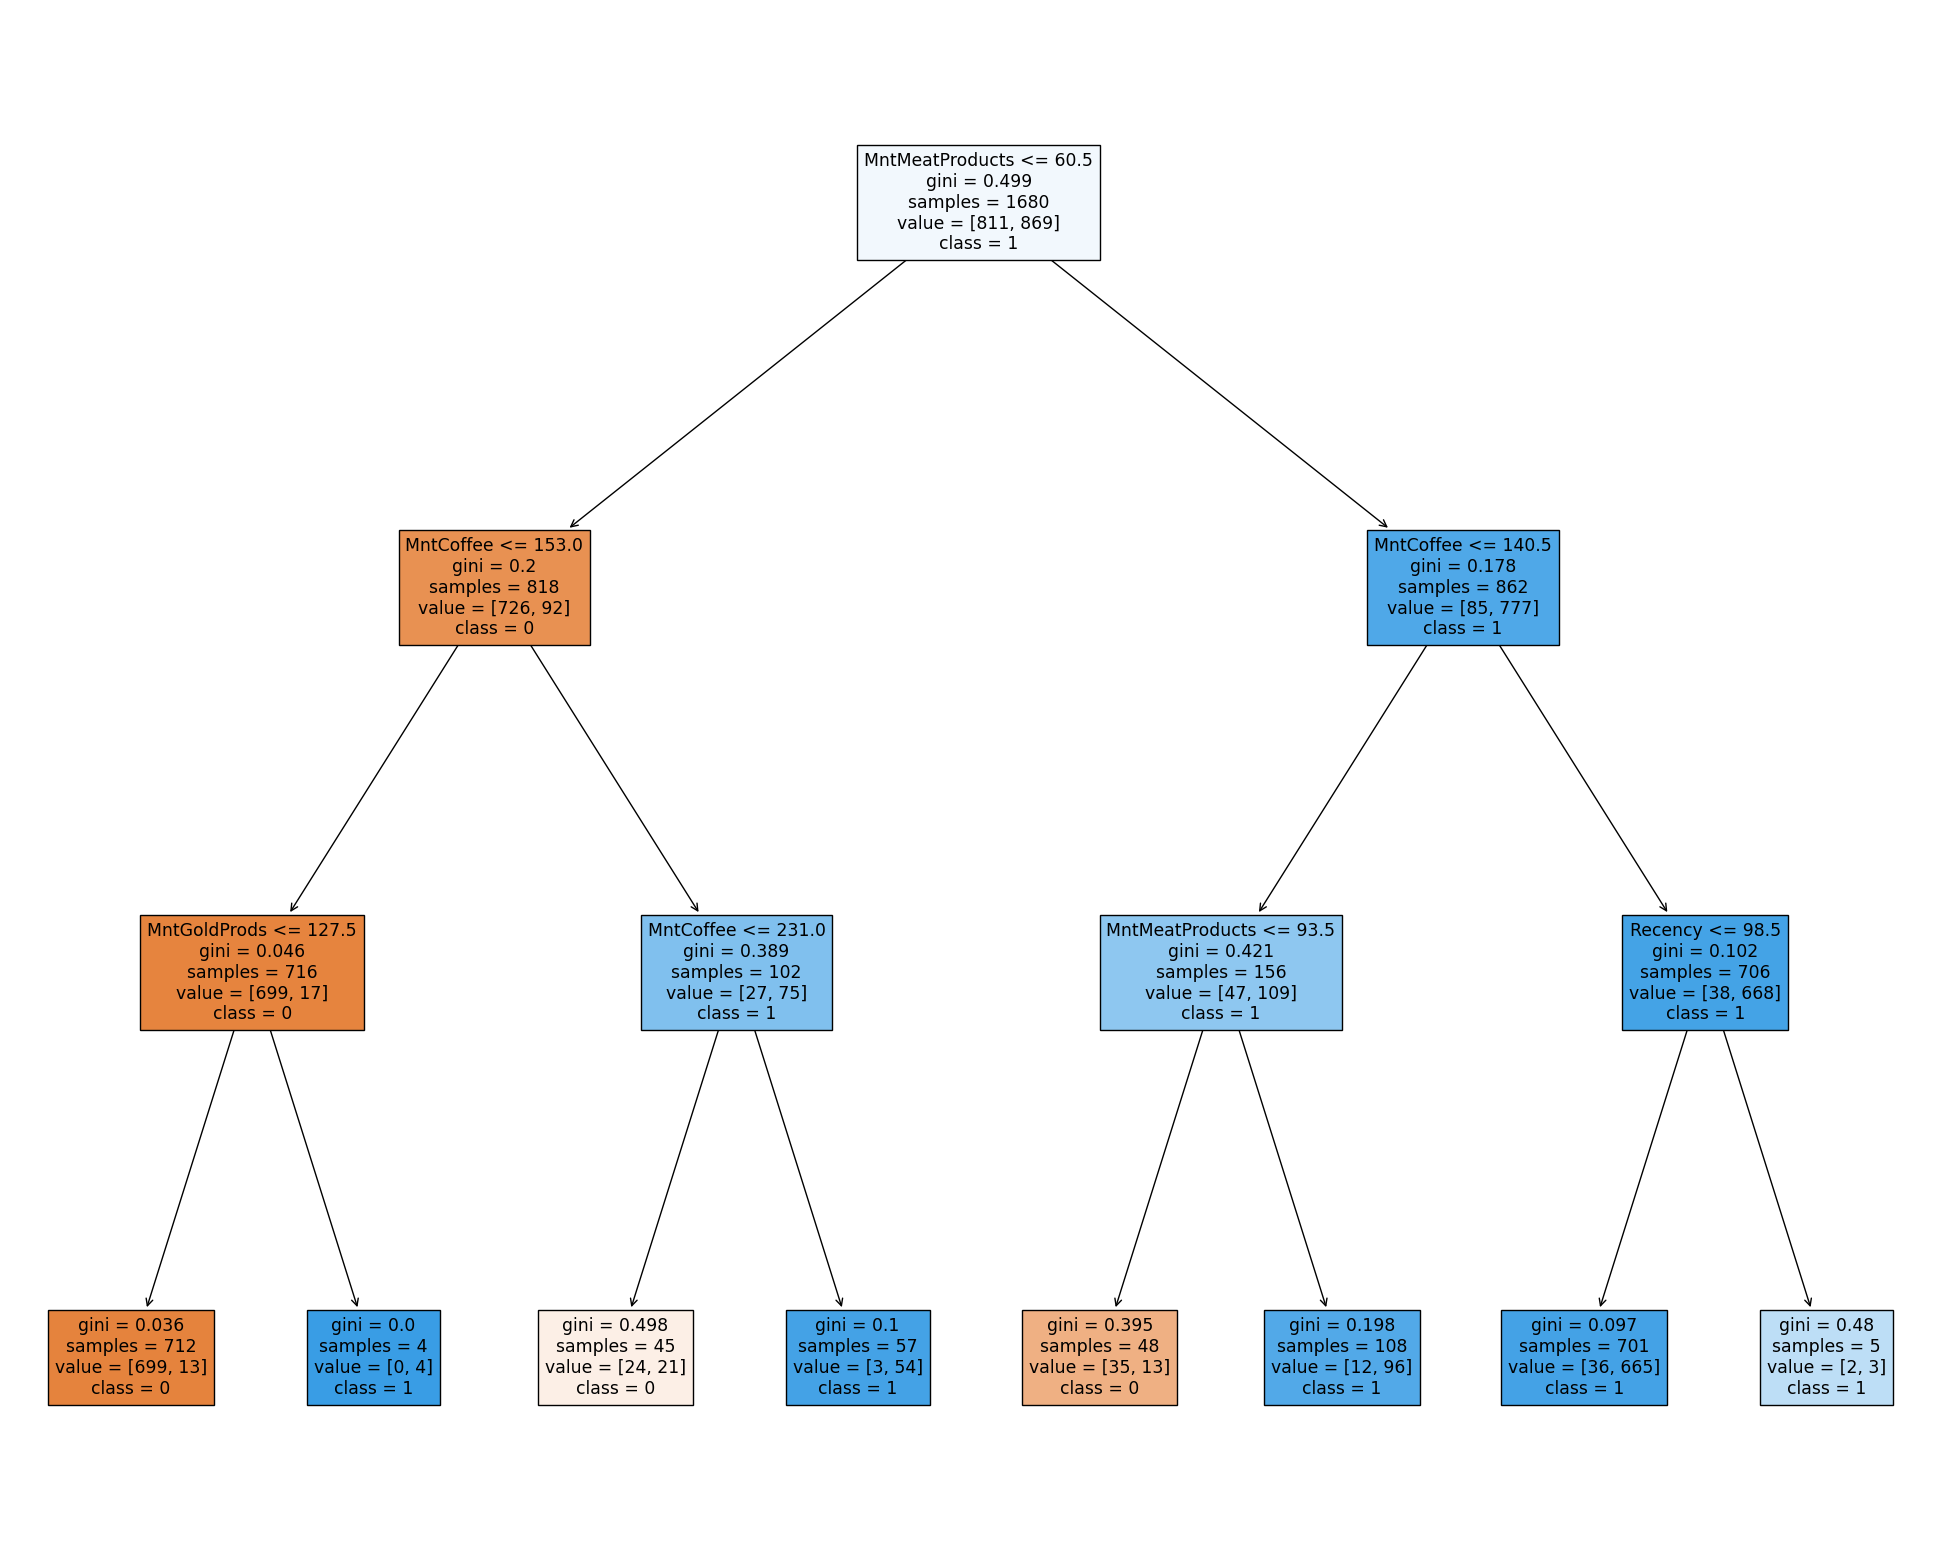

In [996]:
#23

dec_tree = tree.DecisionTreeClassifier(max_depth=3)
dec_tree.fit(x_train,y_train)
pred = dec_tree.predict(x_test)

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dec_tree, feature_names=feature_names, class_names=['0','1'], filled=True)

[]

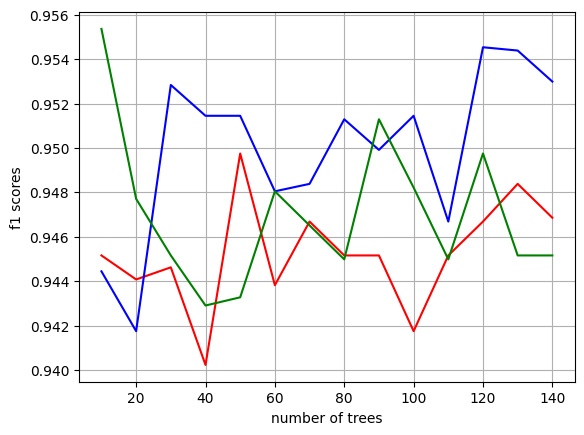

In [997]:
scores5 =[]
scores10 =[]
scores20 =[]

num_of_trees = []
for i in range(1,15):
    rf = ensemble.RandomForestClassifier(n_estimators=10*i, max_depth=5)
    rf10 = ensemble.RandomForestClassifier(n_estimators=10*i, max_depth=10)
    rf20 = ensemble.RandomForestClassifier(n_estimators=10*i, max_depth=20)

    rf.fit(x_train,np.squeeze(y_train))
    preds = rf.predict(x_test)
    scores5.append(f1_score(np.squeeze(y_test),preds))
    rf10.fit(x_train,np.squeeze(y_train))
    preds = rf10.predict(x_test)
    scores10.append(f1_score(np.squeeze(y_test),preds))
    rf20.fit(x_train,np.squeeze(y_train))
    preds = rf20.predict(x_test)
    scores20.append(f1_score(np.squeeze(y_test),preds))
    num_of_trees.append(i*10)


plt.plot(num_of_trees, scores5 , color = 'r')
plt.plot(num_of_trees, scores10 , color = 'b')
plt.plot(num_of_trees, scores20 ,  color = 'g')

plt.ylabel("f1 scores")
plt.xlabel("number of trees")
plt.grid()
plt.plot()

#24
<div dir="rtl", style = "white-space: pre-wrap">
مشاهده می کنیم که افزایش تعداد درخت ها تا یه جایی به مدل کمک کرده و جواب بهتر می شود اما از یک جایی به بعد پاسخ نزولی می شود
همچنین می بینیم 
که افزایش ارتفاع درخت در اینجا به مدل کمک کرده و نتیجه نهایی بهتر شده است
</div>



#25
<div dir="rtl", style = "white-space: pre-wrap">
واریانس مقداری است که وقتی روی زیر مجموعه های داده های آموزشی مختلف عملیات را انجام می دهیم تغیرات بین نتیجه آن هاست در واقع تغیر پذیری مدل را می سنجد
bias نشان دهنده ناتوانی مدل است یا همان ارور یا اختلاف با جواب اصلی در مدل


در جنگل فارست هردو بهتر میشود زیرا داریم همه درخت های ممکن رو امتحان می کنیم پس طبیعتا بهتر خواهد بود

</div>




In [998]:
#26




<h1>
Differential Privacy
</h1>

#26
<div dir="rtl", style = "white-space: pre-wrap">

با نویز دادن به داده ها آن ها و الگوی تفغیرات آن را تغیر می دهیم این کار باعث می اطلاعات عوض شده یا تحلیل آن سخت شود

</div>


#27
<div dir="rtl", style = "white-space: pre-wrap">
لاپلاس معمولا برا اضافه کردن نویز به توابع عددی و توابع پیوسته استفاده می شود
اما از نویز نمایی برا اضافه کردن نویز به توابع گسسته استفاده می شود
</div>






In [999]:
#laplas noise

for fnames in feature_names:
    noise = np.random.laplace(scale=0.1,size= (2240,1))
    data[fnames] += np.squeeze(noise)

x_train,x_test,y_train,y_test = train_test_split(np.array(data[feature_names]),purchase_class.reshape(-1,1))
    


Fitting 3 folds for each of 980 candidates, totalling 2940 fits


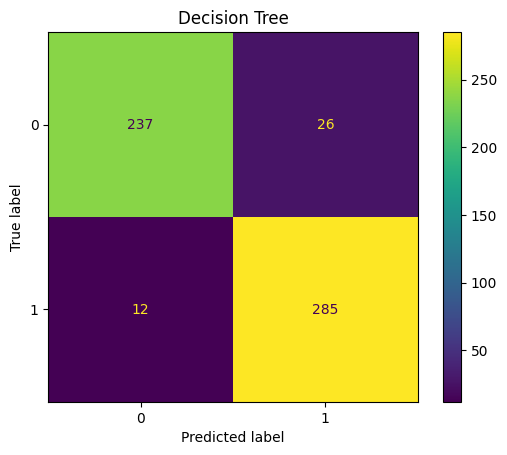

f1_score: 0.9375


In [1000]:
params = {'max_leaf_nodes': list(range(2, 100)), 'max_depth': list(range(5, 10)),'criterion':['entropy','gini']}
dec_tree = GridSearchCV(tree.DecisionTreeClassifier(random_state=42), params, verbose=1, cv=3)
dec_tree.fit(x_train,y_train)
pred = dec_tree.predict(x_test)
cm = confusion_matrix(y_test, pred, labels=dec_tree.classes_ )
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=dec_tree.classes_)
disp.plot()
plt.title("Decision Tree")
plt.show()

print("f1_score:" , f1_score(y_test , pred))


c:\Users\Ali.M\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\Users\Ali.M\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, a

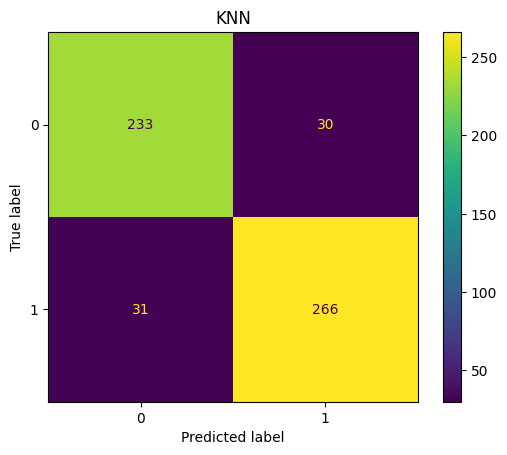

f1_score: 0.897133220910624


In [1001]:
param = {'n_neighbors':[i for i in range(3,14,2)]}
knn_model = GridSearchCV(neighbors.KNeighborsClassifier(),param_grid=param)
knn_model.fit(x_train,np.squeeze(y_train))
pred = knn_model.predict(x_test)
cm = confusion_matrix(np.squeeze(y_test), pred, labels=knn_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=knn_model.classes_)

disp.plot()
plt.title("KNN")
plt.show()

print("f1_score:" , f1_score(y_test , pred))

c:\Users\Ali.M\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


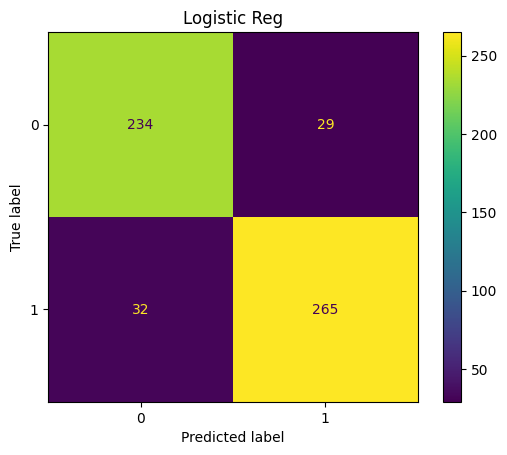

f1_score: 0.8967851099830796


In [1002]:
params = {'tol':[0.0001,0.00001,0.000001]}
logestic_model = GridSearchCV(linear_model.LogisticRegression(),param_grid=params)
logestic_model.fit(x_train,np.squeeze(y_train))
pred = logestic_model.predict(x_test)
cm = confusion_matrix(np.squeeze(y_test), pred, labels=logestic_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=logestic_model.classes_)
disp.plot()
plt.title('Logistic Reg')
plt.show()


print("f1_score:" , f1_score(y_test , pred))



<h2>gradient-boosting</h2>

#29 #30
<div dir="rtl", style = "white-space: pre-wrap">
رندوم فارست اطلاعات را به صورت موازی پردازش می کند در هر درخت اما در روش گفته شده هر درخت اطلاعات خروجی درخت قبلی را پردازش می کند
با این کار ضعف درخت های قبلی را پوشش می دهد
یاد گیری هر درخت با استفاده از درخت قبلی صورت می گیرد
</div>



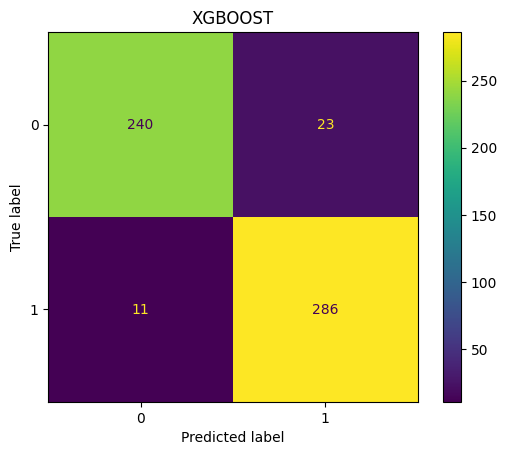

In [1003]:
from xgboost import XGBClassifier
boost_model = XGBClassifier()
boost_model.fit(x_train,y_train)
preds = boost_model.predict(x_test)
cm = confusion_matrix(y_test, preds, labels= boost_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=boost_model.classes_)

disp.plot()
plt.title('XGBOOST')
plt.show()